In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 98.5/98.5 kB 939.1 kB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 10.1/10.1 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681896 sha256=5e47739fd4a0471628767e2eb41c143dcabd160a59bd4bd0355acca05876e062
  Stored in directory: c:\users\mutya\appdata\local\pip\cache\wheels\62\4a\9c\7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7
Successfully built pycountry
     -----------------------

In [21]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mutya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 172


In [22]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  47
positive number:  31
negative number:  89
neutral number:  52


In [23]:
tweet_list[0:20]

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.500000,0.500000,positive,0.000,0.625,0.375,0.2023
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.000000,0.066667,negative,0.165,0.688,0.147,-0.1027
4,Cómo voy a ponerme a pensar en otras historias...,c mo voy a ponerme a pensar en otras historias...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...",por el maythe4thbewithyou jamesgunn public ...,0.000000,0.066667,neutral,0.000,1.000,0.000,0.0000
9,@RonalGames117 La 2 me conmovió mil veces más ...,la 2 me conmovi mil veces m s que cualquier...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,Guardianes de la galaxia 3 es una montaña rusa...,guardianes de la galaxia 3 es una monta a rusa...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,DC con James Gunn logrará darle la vuelta y su...,dc con james gunn lograr darle la vuelta y su...,0.000000,0.000000,positive,0.000,0.897,0.103,0.3400
21,"Increíblemente emotiva, desprende una sensació...",incre blemente emotiva desprende una sensaci ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


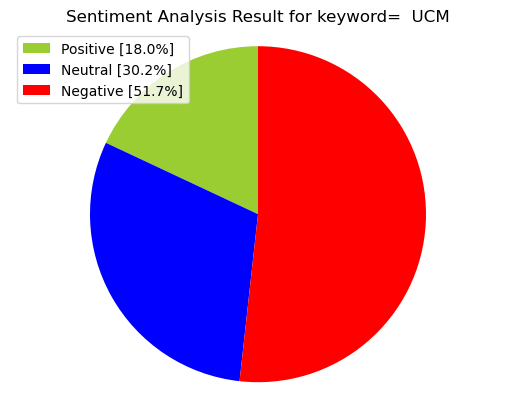

In [24]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [25]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [26]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,0.500000,0.500000,positive,0.000,0.625,0.375,0.2023
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,0.000000,0.066667,negative,0.165,0.688,0.147,-0.1027
4,Cómo voy a ponerme a pensar en otras historias...,Cómo voy a ponerme a pensar en otras historias...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...","Por el #MayThe4thBeWithYou, #JamesGunn publicó...",0.000000,0.066667,neutral,0.000,1.000,0.000,0.0000
9,@RonalGames117 La 2 me conmovió mil veces más ...,@RonalGames117 La 2 me conmovió mil veces más ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,Guardianes de la galaxia 3 es una montaña rusa...,Guardianes de la galaxia 3 es una montaña rusa...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,DC con James Gunn logrará darle la vuelta y su...,DC con James Gunn logrará darle la vuelta y su...,0.000000,0.000000,positive,0.000,0.897,0.103,0.3400
21,"Increíblemente emotiva, desprende una sensació...","Increíblemente emotiva, desprende una sensació...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [27]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
4,Cómo voy a ponerme a pensar en otras historias...,c mo voy a ponerme a pensar en otras historias...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...",por el maythe4thbewithyou jamesgunn public ...,0.0,0.066667,neutral,0.000,1.000,0.000,0.0000
9,@RonalGames117 La 2 me conmovió mil veces más ...,la 2 me conmovi mil veces m s que cualquier...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,Guardianes de la galaxia 3 es una montaña rusa...,guardianes de la galaxia 3 es una monta a rusa...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
14,DC con James Gunn logrará darle la vuelta y su...,dc con james gunn lograr darle la vuelta y su...,0.0,0.000000,positive,0.000,0.897,0.103,0.3400
21,"Increíblemente emotiva, desprende una sensació...",incre blemente emotiva desprende una sensaci ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [28]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

C:\Users\mutya\AppData\Local\Temp\ipykernel_24240\4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
4,Cómo voy a ponerme a pensar en otras historias...,c mo voy a ponerme a pensar en otras historias...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"Por el #MayThe4thBeWithYou, #JamesGunn publicó...",por el maythe4thbewithyou jamesgunn public ...,0.0,0.066667,neutral,0.000,1.000,0.000,0.0000
9,@RonalGames117 La 2 me conmovió mil veces más ...,la 2 me conmovi mil veces m s que cualquier...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,Guardianes de la galaxia 3 es una montaña rusa...,guardianes de la galaxia 3 es una monta a rusa...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
14,DC con James Gunn logrará darle la vuelta y su...,dc con james gunn lograr darle la vuelta y su...,0.0,0.000000,positive,0.000,0.897,0.103,0.3400
21,"Increíblemente emotiva, desprende una sensació...",incre blemente emotiva desprende una sensaci ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [29]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [30]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [31]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,27,57.45
negative,11,23.40
positive,9,19.15


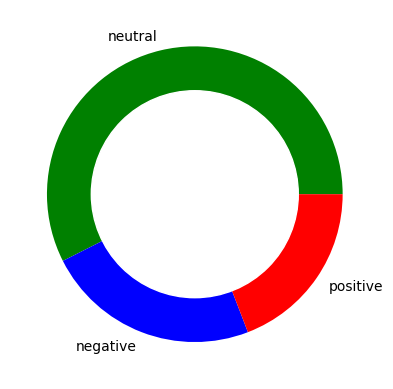

In [32]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [33]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



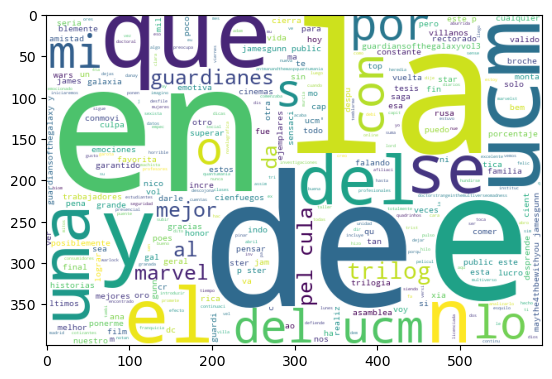

In [34]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

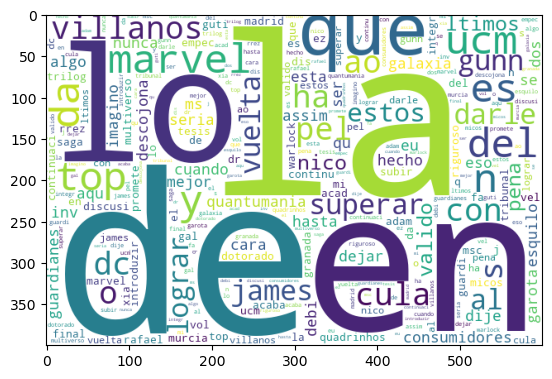

In [35]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

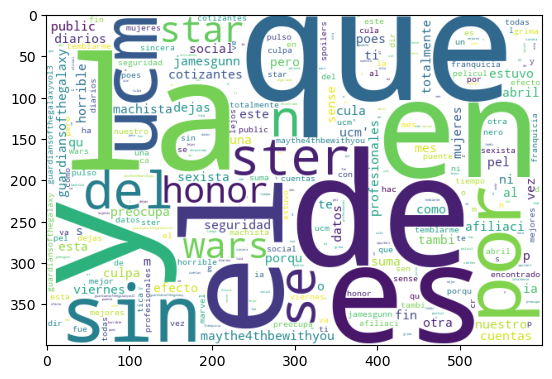

In [36]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

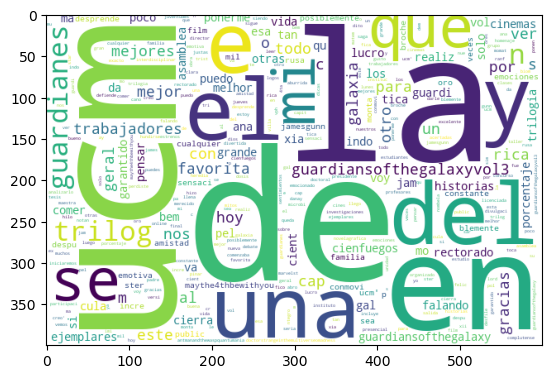

In [37]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)